In [1]:
import numpy as np
import matplotlib.pyplot as plt
from curvature import *
from curvetools import *
from skimage import measure
import skimage.io
import glob

In [2]:
def get_d2(X, n_samples, bins):
    N = X.shape[0]
    t = np.linspace(0, 1, N)
    s1 = np.random.rand(n_samples)
    Y1 = np.array([np.interp(s1, t, X[:, 0]), np.interp(s1, t, X[:, 1])]).T
    s2 = np.random.rand(n_samples)
    Y2 = np.array([np.interp(s2, t, X[:, 1]), np.interp(s2, t, X[:, 1])]).T
    d = np.sqrt(np.sum((Y1-Y2)**2, axis=1))
    return np.histogram(d, bins)[0]

In [3]:
classes = ["apple","bat","beetle", "bird","Bone","bottle","brick","camel","car","carriage","cellular_phone","children","chopper","classic","comma","deer","device0","device1","device2","device8","elephant","face","fountain","Glas","hammer","HCircle","Heart","jar","key","lmfish","Misk","octopus","pencil","personal_car","rat","ray","sea_snake","shoe","spoon","spring","stef","teddy","tree","truck","watch"]
N = len(classes)*20
curves = []
for i, c in enumerate(classes):
    for j, filename in enumerate(glob.glob("mpeg7/{}*.gif".format(c))):
        X = get_curve(filename)
        curves.append(X)

In [4]:
n_samples = 1000000
n_bins = 50
bins = np.linspace(0, 3, n_bins+1)
H = np.zeros((len(curves), n_bins))
for i in range(len(curves)):
    print(".", end='')
    H[i, :] = get_d2(curves[i], n_samples, bins)

....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

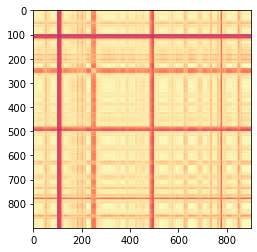

In [5]:
# Compute all pairs earth mover's distance
HSum = np.cumsum(H, axis=1)
D = np.zeros((HSum.shape[0], HSum.shape[0]))
for i in range(H.shape[0]):
    for j in range(i+1, H.shape[0]):
        D[i, j] = np.sum(np.abs(H[i, :] - H[j, :]))
D += D.T


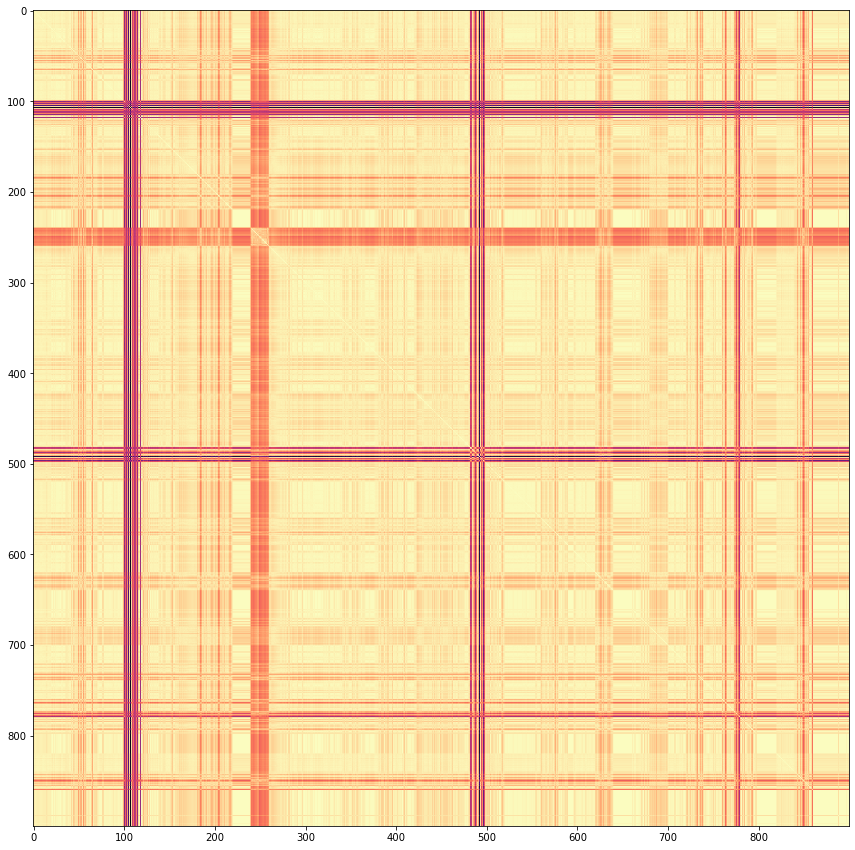

In [7]:
plt.figure(figsize=(15, 15))
plt.imshow(D, cmap='magma_r')

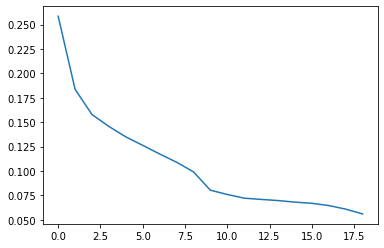

In [11]:
def getPrecisionRecall(D, NPerClass = 20):
    PR = np.zeros(NPerClass-1)
    DI = np.argsort(D, 1)
    for i in range(DI.shape[0]):
        pr = np.zeros(NPerClass-1)
        recall = 0
        for j in range(1, DI.shape[1]): #Skip the first point (don't compare to itself)
            if DI[i, j]//NPerClass == i//NPerClass:
                if recall < pr.size:
                    pr[recall] = float(recall+1)/j
                recall += 1
        PR += pr
    return PR/float(DI.shape[0])

PR = getPrecisionRecall(D)
plt.plot(PR)

In [12]:
np.savetxt("mpeg7-d2-pr.txt", PR)